In [33]:
import nltk
import numpy as py
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

import re
import numpy as np
import pandas as pd
from pprint import pprint

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import Counter
from gensim.test.utils import datapath
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import export_text
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
new_data = pd.read_csv("../../Youth_Recidivism_Project/Dataset/full_DTdata.csv")

In [25]:
print(list(new_data.columns)[:-10])

['AncillaryServices', 'BehaviorManagement', 'Check-in', 'ClothingVoucher', 'CommunityService', 'CrisisScreening', 'CurfewManagement', 'Dental', 'DrugScreening', 'Educational', 'Educational/Vocational', 'FamilyRelationships', 'HealthServices', 'Housing', 'InitialVisit', 'Legal', 'LevelReview', 'LifeSkills', 'Meeting', 'Pass', 'Psychiatric', 'Psychological', 'RRT', 'Recreation', 'RevocationHearing', 'SocialServices', 'SubstanceAbuse', 'SupervisedVisit', 'Vocational', 'Adultcorrections', 'Client', 'CommunityActivity', 'Court', 'DistrictOfficevisit', 'ElectronicCommunications', 'Employmentvisit', 'ExternalCollateral', 'Family', 'FamilyMember(s)', 'FamilySupport(s)', 'Father', 'Guardian', 'HomeofOther', 'Homevisit', 'InternalCollateral', 'MedicalOffice/Clinic', 'Mother', 'Non-CWStaffing', 'OtherAgency', 'Parent/Guardian', 'Policestation', 'Programvisit', 'Schoolvisit', 'Staffing(CWuseonly)', 'Streetcontact', 'TransportOnly', 'CommitDays', 'CONTACT_TYPE', 'YES']


In [34]:
label_LDA = new_data.iloc[:,-1].to_numpy()
feature = new_data.iloc[:,:-11].to_numpy()
label = new_data.iloc[:,-11].to_numpy() # YES

data_YES = pd.DataFrame(feature)
data_YES['label'] = label
data_YES = data_YES.to_numpy()

In [35]:
print(data_YES)

[[   0    0    1 ... 2408    6    0]
 [   0    0    1 ... 2408    4    0]
 [   0    0    1 ... 2408    6    0]
 ...
 [   0    0    1 ...   63   10    1]
 [   0    0    1 ...   63    5    1]
 [   0    0    0 ...   63   22    1]]


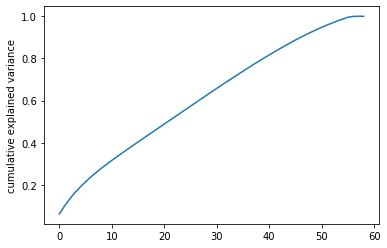

In [36]:
pca = PCA()
X = StandardScaler().fit_transform(data_YES)
clf = pca.fit(X)
ex = -np.sort(-pca.explained_variance_ratio_)
plt.plot(np.array([i for i in range(59)]),np.cumsum(ex))
plt.ylabel('cumulative explained variance')
plt.show()

In [37]:
print(feature.shape)
print(label)

(146317, 58)
[0 0 0 ... 1 1 1]


In [76]:
X_train, X_test, y_train, y_test = train_test_split(feature, list(label), test_size=0.15, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#tree.plot_tree(clf) 

In [77]:
clf.score(X_test, y_test)

0.9636413340623291

In [78]:
print(clf.get_depth())
print(clf.get_n_leaves())

64
6375


[0.6205121195553126,
 0.712547840349918,
 0.7987060324403135,
 0.8757062146892656,
 0.9149353016220156,
 0.9409969017678148,
 0.9544833242208858,
 0.9610898487333698,
 0.9631401494441407,
 0.9635502095862949]

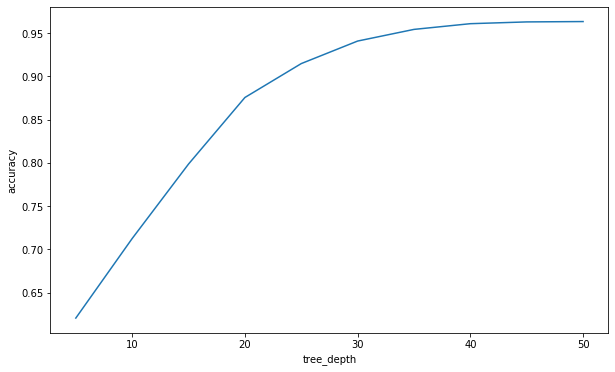

In [63]:
def test_clf(depth):
    result = []
    for i in depth:
        clf = tree.DecisionTreeClassifier(max_depth = i)
        clf = clf.fit(X_train, y_train)
        result.append(clf.score(X_test, y_test))
    plt.figure(figsize=(10, 6))
    plt.plot(depth, result)
    plt.xlabel("tree_depth")
    plt.ylabel("accuracy")
    return result
test_clf([5,10,15,20,25,30,35,40,45,50])

In [79]:
clf = tree.DecisionTreeClassifier(max_depth = 20)
clf = clf.fit(X_train, y_train)
#tree.plot_tree(clf) 
print(clf.score(X_test, y_test))
print(clf.get_depth())
print(clf.get_n_leaves())

0.8754328412611627
20
1919


In [80]:
x = clf.apply(feature)
z = [0] * len(x)
x = pd.DataFrame({'branch':x,"num_of_instance":z})
x = x.groupby(['branch']).count().sort_values(by=['num_of_instance'],ascending = False)
print(x)

        num_of_instance
branch                 
76                10566
153                5265
20                 3227
212                3222
21                 2503
...                 ...
2940                  1
1629                  1
1630                  1
1637                  1
3100                  1

[1919 rows x 1 columns]


In [81]:
x.to_csv("../../Youth_Recidivism_Project/DecisionTree_Output/Future_analysis_DT_summary.csv")

In [82]:
columns = list(new_data.columns)[:-11]
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=columns,
                      filled=True, rounded=True,
                                class_names = ['0','1'],
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("../../Youth_Recidivism_Project/DecisionTree_Output/Future_Analysis_DecisionTree_result.dot")

'../../Youth_Recidivism_Project/DecisionTree_Output/Future_Analysis_DecisionTree_result.dot.pdf'